Because K Means is distance-based, it's necessary to scale the data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('./data/customers.csv')
data.head()

,CustomerID,Products0,Products1,Products2,Products3,Products4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,12347.0,408.90,2796.26,105.80,459.7,539.34,182,5.04,249.6,23.681319,4310.00,1
1,12348.0,524.60,1230.88,41.76,0.0,0.00,31,13.20,240.0,57.975484,1797.24,1
2,12349.0,244.87,1145.48,138.15,0.0,229.05,73,6.64,300.0,24.076027,1757.55,1
3,12350.0,0.00,299.00,20.40,0.0,15.00,17,8.50,40.0,19.670588,334.40,1
4,12352.0,257.60,1214.61,0.00,0.0,73.20,95,-376.50,376.5,16.267474,1545.41,1


In [2]:
customers = data.drop('CustomerID',axis=1)

In [3]:
scaler = StandardScaler()
scaled_customers = scaler.fit_transform(customers)

In [4]:
scaled_customers = pd.DataFrame(scaled_customers, columns=customers.columns)
scaled_customers.head()

,Products0,Products1,Products2,Products3,Products4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,0.165179,0.262983,0.024911,0.300287,0.438827,0.382407,0.095008,0.376228,-0.040763,0.293246,3.058668
1,0.262174,-0.010093,-0.099085,-0.153843,-0.169262,-0.267082,0.124396,0.348298,0.228506,-0.012427,3.058668
2,0.027667,-0.024991,0.087548,-0.153843,0.088985,-0.086430,0.100770,0.522858,-0.037663,-0.017255,3.058668
3,-0.177616,-0.172657,-0.140443,-0.153843,-0.152350,-0.327300,0.107469,-0.233567,-0.072254,-0.190378,3.058668
4,0.038339,-0.012931,-0.179942,-0.153843,-0.086731,0.008198,-1.279098,0.745421,-0.098974,-0.043061,3.058668


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_nums = range(2,8)
scores = []

In [6]:
for cluster_num in cluster_nums:
    kmeans = KMeans(cluster_num)
    
    clusters = kmeans.fit_predict(scaled_customers)
    silhouette = silhouette_score(scaled_customers, clusters)

    scores.append(silhouette)

In [7]:
import matplotlib.pyplot as plt

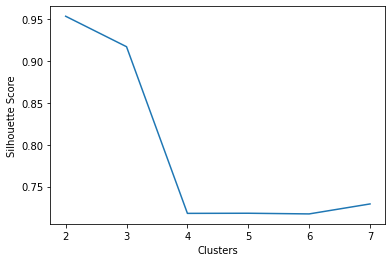

In [8]:
plt.plot(cluster_nums, scores)
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
plt.show()

In [27]:
kmeans = KMeans(3)
kmeans.fit(scaled_customers)

KMeans(n_clusters=3)

In [28]:
scaler.inverse_transform(kmeans.cluster_centers_).shape

(3, 11)

<AxesSubplot:>

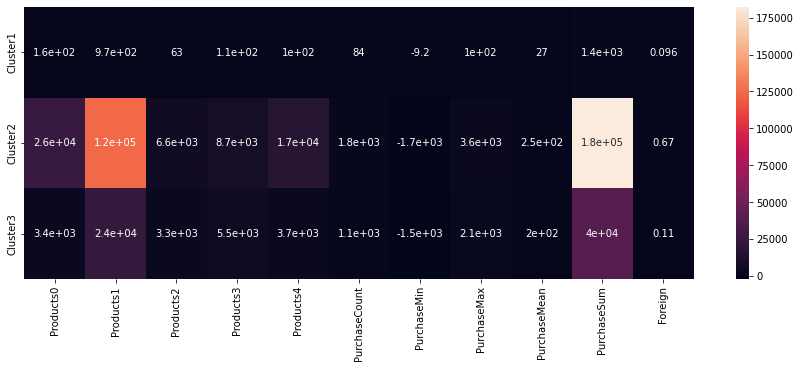

In [29]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(
    scaler.inverse_transform(kmeans.cluster_centers_),
    annot=True,
    yticklabels=['Cluster1','Cluster2','Cluster3',],
    xticklabels=scaled_customers.columns
)

In [30]:
data['Cluster'] = kmeans.labels_
data.head()

,CustomerID,Products0,Products1,Products2,Products3,Products4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign,Cluster
0,12347.0,408.90,2796.26,105.80,459.7,539.34,182,5.04,249.6,23.681319,4310.00,1,0
1,12348.0,524.60,1230.88,41.76,0.0,0.00,31,13.20,240.0,57.975484,1797.24,1,0
2,12349.0,244.87,1145.48,138.15,0.0,229.05,73,6.64,300.0,24.076027,1757.55,1,0
3,12350.0,0.00,299.00,20.40,0.0,15.00,17,8.50,40.0,19.670588,334.40,1,0
4,12352.0,257.60,1214.61,0.00,0.0,73.20,95,-376.50,376.5,16.267474,1545.41,1,0


In [32]:
data['Cluster'].value_counts()

0    4336
2      28
1       6
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='PurchaseCount', ylabel='PurchaseSum'>

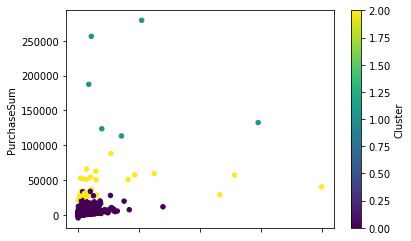

In [33]:
data.plot.scatter(x='PurchaseCount', y='PurchaseSum', c='Cluster', colormap='viridis')

In [ ]:
data.to_csv('./data/customers_clusters.csv', index=False)